In [20]:
!uv pip install konlpy
#!uv pip install eunjeon

Using Python 3.10.16 environment at: C:\Users\user\Downloads\0708\woogawooga_project\.venv
Audited 1 package in 18ms


In [32]:
from konlpy.tag import Okt

okt = Okt()
df= pd.read_csv('C:/Users/user/Downloads/0708/woogawooga_project/dataset_create/Chaeyeon/phishing_data.csv')
#토큰화 
def tokenize_okt(text):
    if pd.isnull(text):
        return []
    morphs = okt.pos(text, stem=True) #동사, 형용사는 어간 형태로 반환
    target_pos = {"Noun", "Verb", "Adjective"}
    result = [word for word, pos in morphs if pos in target_pos] #명사 동사 형용사만 추출
    return result

df["tokens"] = df["text"].apply(tokenize_okt)

In [33]:
from collections import Counter

# 모든 토큰 리스트 합치기
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# 등장 빈도수 계산
token_counts = Counter(all_tokens)

# 상위 20개 보기
top_20 = token_counts.most_common(20)
for word, count in top_20:
    print(f"{word}: {count}")


하다: 21481
네: 12127
되다: 9935
있다: 8454
예: 6762
그: 6551
거: 6261
본인: 5755
지금: 5741
제: 4617
그렇다: 4474
저희: 4177
아니다: 4074
이: 3924
드리다: 3913
이제: 3646
없다: 3547
고객: 3450
확인: 3409
뭐: 3171


In [35]:
import pandas as pd
from collections import Counter

# 1. 모든 토큰 펼치기 (리스트 안의 리스트 → 하나의 리스트로)
all_tokens = df["tokens"].explode().dropna().tolist()

# 2. 단어 빈도수 계산
token_counts = Counter(all_tokens)

# 3. 상위 700개 키워드 추출
top_700 = token_counts.most_common(700)

# 4. 데이터프레임으로 변환
top_700_df = pd.DataFrame(top_700, columns=["word", "count"])

# 5. CSV로 저장 (로컬 저장 경로 지정 가능)
top_700_df.to_csv("top_700_okt_vp_keywords.csv", index=False, encoding="utf-8-sig")

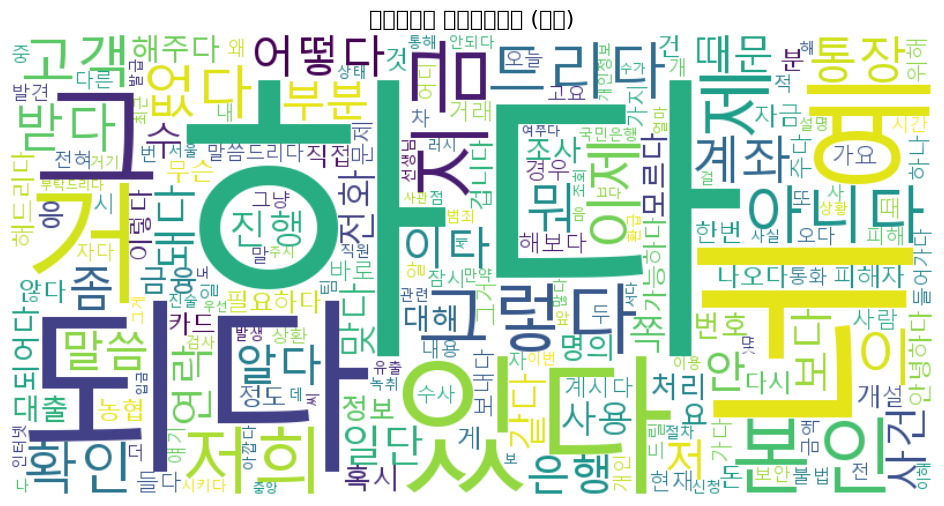

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 임시 예시 토큰
sample_tokens = df["tokens"].explode().dropna().tolist()

# 빈도수 계산
token_counts = Counter(sample_tokens)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="malgun.ttf",  # 한글 폰트 (Windows 기준)
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(token_counts)

# 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("보이스피싱 워드클라우드 (예시)", fontsize=16)
plt.show()


In [24]:
# 모든 토큰 리스트 합치기
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# 등장 빈도수 계산
token_counts = Counter(all_tokens)

# 상위 20개 보기
top_20 = token_counts.most_common(20)
for word, count in top_20:
    print(f"{word}: {count}")

하다: 21481
네: 12127
되다: 9935
있다: 8454
예: 6762
그: 6551
거: 6261
본인: 5755
지금: 5741
제: 4617
그렇다: 4474
저희: 4177
아니다: 4074
이: 3924
드리다: 3913
이제: 3646
없다: 3547
고객: 3450
확인: 3409
뭐: 3171


In [29]:
import pandas as pd
from collections import Counter

# 1. 모든 토큰 펼치기 (리스트 안의 리스트 → 하나의 리스트로)
all_tokens = df["tokens"].explode().dropna().tolist()

# 2. 단어 빈도수 계산
token_counts = Counter(all_tokens)

# 3. 상위 700개 키워드 추출
top_700 = token_counts.most_common(700)

# 4. 데이터프레임으로 변환
top_700_df = pd.DataFrame(top_700, columns=["word", "count"])

# 5. CSV로 저장 (로컬 저장 경로 지정 가능)
top_700_df.to_csv("top_700_okt_keywords.csv", index=False, encoding="utf-8-sig")


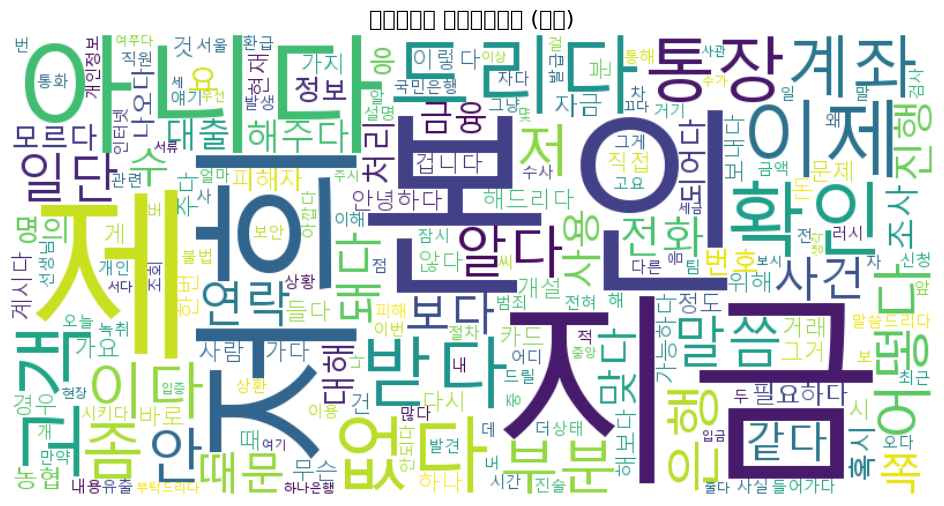

In [ ]:
#불용어 제거
#custom_stopwords = {"하다", "되다", "있다", "그", "예", "네", "이", "그렇다", "뭐", "거"}
df["tokens"] = df["tokens"].apply(lambda tokens: [t for t in tokens if t not in custom_stopwords])
# 임시 예시 토큰
sample_tokens = df["tokens"].explode().dropna().tolist()

# 빈도수 계산
token_counts = Counter(sample_tokens)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path="malgun.ttf",  # 한글 폰트 (Windows 기준)
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(token_counts)

# 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("보이스피싱 워드클라우드 (예시)", fontsize=16)
plt.show()

In [26]:
# 모든 토큰 리스트 합치기
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# 등장 빈도수 계산
token_counts = Counter(all_tokens)

# 상위 20개 보기
top_20 = token_counts.most_common(20)
for word, count in top_20:
    print(f"{word}: {count}")

본인: 5755
지금: 5741
제: 4617
저희: 4177
아니다: 4074
드리다: 3913
이제: 3646
없다: 3547
고객: 3450
확인: 3409
받다: 3013
통장: 2799
계좌: 2749
좀: 2432
이다: 2251
어떻다: 2244
안: 2177
부분: 2140
알다: 2095
말씀: 2069


In [ ]:
import pandas as pd
from collections import Counter

# 1. 모든 토큰 펼치기 (리스트 안의 리스트 → 하나의 리스트로)
all_tokens = df["tokens"].explode().dropna().tolist()

# 2. 단어 빈도수 계산
token_counts = Counter(all_tokens)

# 3. 상위 500개 키워드 추출
top_500 = token_counts.most_common(500)

# 4. 데이터프레임으로 변환
top_500_df = pd.DataFrame(top_500, columns=["word", "count"])

# 5. CSV로 저장 (로컬 저장 경로 지정 가능)
#top_500_df.to_csv("top_500_keywords.csv", index=False, encoding="utf-8-sig")
